In the first part I have retrieved the data from google drive.

I have created a folder in Google drive named "dataset" that contain the dataset ***MELD_train_efr.json, MELD_val_efr.json, MELD_test_efr.json.***

In this way i've created data_train, data_val, data_test *with pd.read_json*, used for json file.

E' da inserire la statistica riguardante chi è sono gli speaker più attivi e dove si collocano maggiormente i trigger

In [ ]:
import pandas as pd
from google.colab import drive
import os
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/dataset'

files = os.listdir(drive_path)

#for file in files:
    #print(file)

data_train = pd.read_json('/content/drive/MyDrive/dataset/EDiReF-Train-Data/Task 3/MELD_train_efr.json')
data_val = pd.read_json('/content/drive/MyDrive/dataset/EDiReF-Val-Data/MELD_val_efr.json')
data_test = pd.read_json('/content/drive/MyDrive/dataset/EDiReF-Test-Data/MELD_test_efr.json')

for i in range(data_train.shape[0]):
  array = data_train.iloc[i]['triggers']
  array = [0.0 if x is None else x for x in array]
  data_train.at[i, 'triggers'] = array

for i in range(data_val.shape[0]):
  array_1 = data_val.iloc[i]['triggers']
  array_1 = [0.0 if x is None else x for x in array_1]
  data_val.at[i, 'triggers'] = array_1

print(data_train.iloc[3105]['triggers'])



Mounted at /content/drive
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]




*   Removing **NaN Values** in **data_train** and **data_val**, making the substitution **0.0 <--> None.**

  Why None? Because pd.read_json automatically convert NaN values in None.



We need to do some statistical analysis between trigger and emotion and between trigger and utturances.



## Analysis

In the first part I've discovered that:

*   **MEAN VALUE OF TRIGGER FOR EPISODE** = 1.39
*   **MAX NUMBER OF TRIGGERS IN ONE EPISODE** = 12

The final part is in order to see the distribution of triggers.




Number of triggers:
triggers
0.0    29425
1.0     5575
Name: count, dtype: int64
Numero medio di triggers per episodio: 1.39375
Numero massimo di triggers per episodio: 12.0
(4000,) (35000, 5)


<Axes: title={'center': 'Triggers frequency for episode'}, xlabel='episode'>

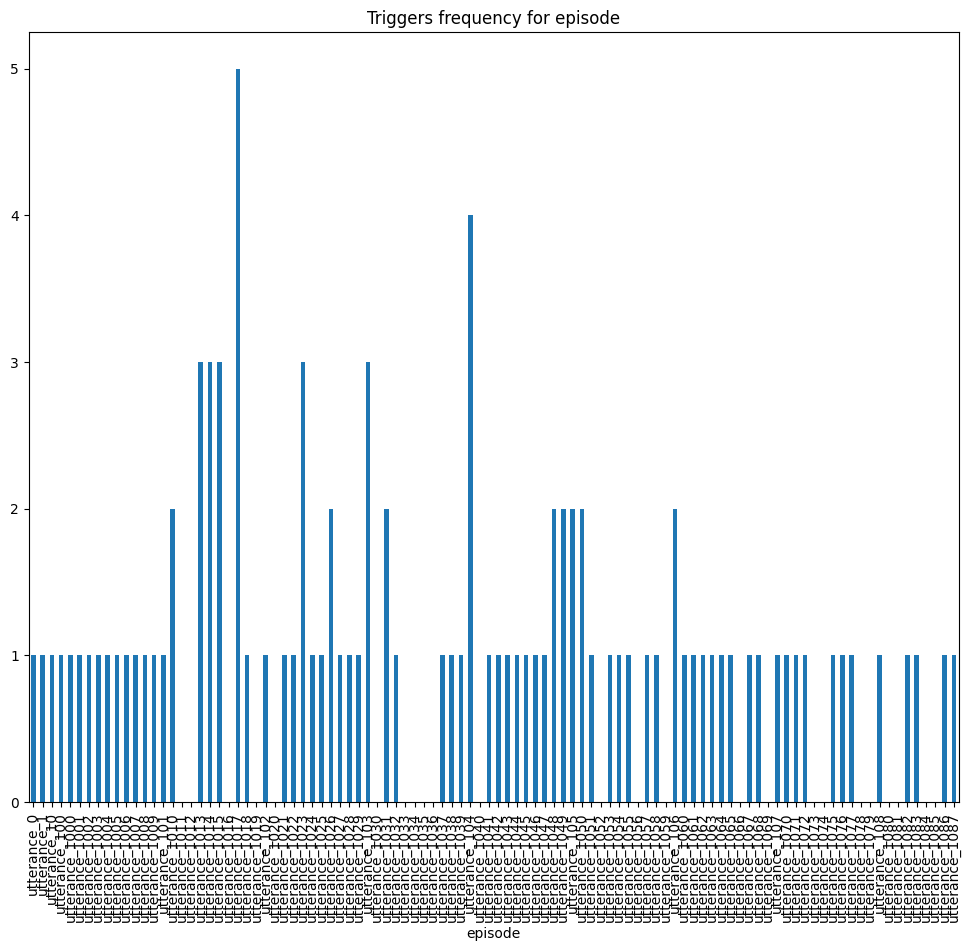

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

trigger_counts = data_train['triggers'].explode().value_counts().sort_index()
print("Number of triggers:")
print(trigger_counts)

data_expanded = data_train.explode(['triggers'])

trigger_counts = data_expanded.groupby('episode')['triggers'].sum()

average_triggers_per_episode = trigger_counts.mean()

print(f"Numero medio di triggers per episodio: {average_triggers_per_episode}")
print(f"Numero massimo di triggers per episodio: {trigger_counts.max()}")

print(trigger_counts.shape,data_expanded.shape)

trigger_counts[:100].plot(kind= 'bar', figsize = (12,10), title='Triggers frequency for episode')

An histogram for the distribution of the emotions

(array([15263.,     0.,     0.,  4645.,     0.,     0.,  1114.,     0.,
            0.,     0.,  2648.,     0.,     0.,  6317.,     0.,     0.,
         1049.,     0.,     0.,  3964.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

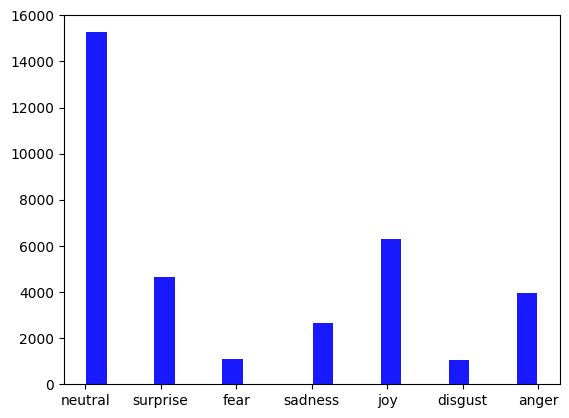

In [ ]:
data_expandend_emotions = data_train.explode(["emotions"])
plt.hist(data_expandend_emotions["emotions"], bins=20, rwidth=0.9, color='blue',
         alpha=0.9)

This is an histogram for the distance from the change of the emotion and the trigger.




(array([3640.,    0.,    0., 3679.,    0.,    0., 4036.,    0.,    0.,
           0., 3977.,    0.,    0., 4012.,    0.,    0., 1569.,    0.,
           0., 1601.]),
 array([-2. , -1.7, -1.4, -1.1, -0.8, -0.5, -0.2,  0.1,  0.4,  0.7,  1. ,
         1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <BarContainer object of 20 artists>)

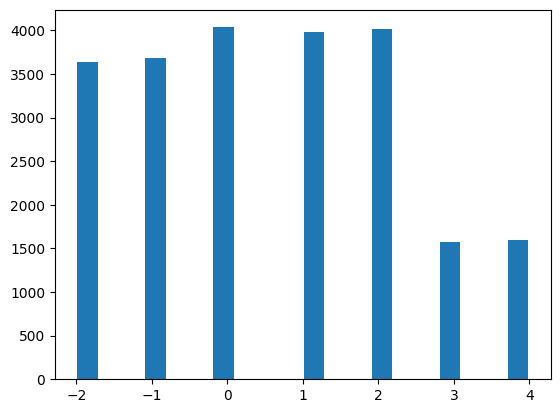

In [ ]:
dataset_emotions = data_train['emotions'].explode()

dataset_triggers = data_train['triggers'].explode()

emotions = pd.unique(dataset_emotions)

list_of_emotions = dataset_emotions.tolist()
list_of_triggers = dataset_triggers.tolist()

distance = []
k=0

for i in range(len(dataset_triggers)-1):
  k=i
  if list_of_emotions[i+1] != list_of_emotions[i]:
    for j in range(i+1,i-4,-1):
      if j<0:
        continue
      elif list_of_triggers[j] == 1:
        distance.append(j-i+1)
        k+=1
        continue

    if k == i:
      for j in range(i+2,i+4):
        if j >= len(dataset_emotions):
          break
        elif list_of_triggers[j] == 1:
          distance.append(j-i+1)
          continue


plt.hist(distance, bins = 20, rwidth = 0.9)


ARE THERE AS MANY TRIGGERS AS THERE ARE CHANGES OF EMOTION?

1) The answer is no, there are definitely more changes of emotion than triggers.

Looking at Chandler's speech, only 24% of changes of emotion correspond to a trigger.




In [ ]:
k=0

expanded_speakers = data_train['speakers'].explode()
#unique_speaker = expanded_speakers.unique()
#print(unique_speaker)

expanded_speakers_list = expanded_speakers.tolist()

Chandler_emotions =[]
Chandler_emotions.extend([list_of_emotions[i] for i in range(len(list_of_emotions)) if expanded_speakers_list[i] == 'Chandler'])
print(Chandler_emotions)

Chandler_triggers =[]
Chandler_triggers.extend([list_of_triggers[i] for i in range(len(list_of_triggers)) if expanded_speakers_list[i] == 'Chandler'])
print(Chandler_triggers)

for i in range(len(Chandler_emotions)-1):
  if Chandler_emotions[i+1] != Chandler_emotions[i]:
      k+=1

if k!=len([i for i, trigger in enumerate(Chandler_triggers) if trigger == 1]):
  print(False)

print(k,len([i for i, trigger in enumerate(Chandler_triggers) if trigger == 1]) )

['neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'fear', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'fear', 'surprise', 'neutral', 'joy', 'neutral', 'joy', 'neutral', 'joy', 'surprise', 'neutral', 'joy', 'surprise', 'neutral', 'joy', 'surprise', 'disgust', 'neutral', 'joy', 'surprise', 'disgust', 'neutral', 'joy', 'surprise', 'disgust', 'neutral', 'neutral', 'joy', 'surprise', 'disgust', 'neutral', 'neutral', 'joy', 'surprise', 'disgust', 'neutral', 'joy', 'surprise', 'surprise', 'surprise', 'joy', 'joy', 'joy', 'joy', 'neutral', 'joy', 'joy', 'neutral', 'joy', 'joy', 'neutral', 'joy', 'joy', 'joy', 'neutral', 'joy', 'joy', 'joy', 'neutral', 'joy', 'surprise', 'joy', 'joy', 'neutral', 'joy', 'surprise', 'joy', 'joy', 'neutral', 'joy', 'surprise', 'joy', 'joy', 'neutral', 'joy', 'surprise', 'sadness', 'joy', 'joy', 'neutral', 'joy', 'surprise', 'sadness', 'sadness', 'sadness', 'surprise',

WE CAN SEE THTA IN MANY EPISODE THE FIRST SENTENCE IS EQUAL TO THE PREVIOUS EPISODE SO IS RIGHT TO SAY THAT THE UTTERANCES BELONGS TO THE SAME EPISODE.

CREATION OF MELD CSV, WITH MODIFICATION OF NUMBER_ID

In [ ]:
import json

path_to_meld = 'drive/My Drive/MELD'

folder_path = 'MELD'

# Elenco dei file nella cartella
file_list = os.listdir(path_to_meld)
filtered_list = [f for f in file_list if f != '.ipynb_checkpoints']
print(file_list)

name_columns = ["Episode_Id", "Speaker", "Emotion_type", "Utterance", "Value(0/1)"]
for name in filtered_list:

  file_initials =  name
  #print(file_initials)

  if "test" in file_initials:
    is_test = True

  else:
    is_test = False

  file_name = path_to_meld  + "/" + file_initials

  with open(file_name, 'r') as file:
        dataset = json.load(file)

  episodes_list = [entry['episode'] for entry in dataset]
  speakers_list = [entry['speakers'] for entry in dataset]
  utterances_list = [entry['utterances'] for entry in dataset]

  emotions_list = [entry['emotions'] for entry in dataset]

  if is_test:
    triggers_list = [[0] * len(entry['speakers']) for entry in dataset]

  else:
    triggers_list = [entry['triggers'] for entry in dataset]

  data = [[], [], [], [], []]

  N = len(dataset)

  first_sentence = None
  id_dialog = -1

  for i in range(N):

    if first_sentence != utterances_list[i][0]:
        id_dialog  += 1
        first_sentence = utterances_list[i][0]

    for j in range(len(utterances_list[i])):
        data[0].append(id_dialog)
        data[1].append(speakers_list[i][j])
        data[2].append(emotions_list[i][j])
        data[3].append(utterances_list[i][j])
        data[4].append(triggers_list[i][j])

    for k in range(5):
        data[k].append("/")

#print(data[1])
  df = pd.DataFrame(data)
  df = df.transpose()
  df.columns = name_columns
  df.to_csv(file_initials[:-5] + ".csv", index=False)



['MELD_val_efr.json', 'MELD_test_efr.json', 'MELD_train_efr.json']


JSONDecodeError: Invalid control character at: line 40685 column 9 (char 1007554)

### **DATA PREPROCESSING**


In [ ]:
import tqdm
import random

training_path = "MELD_train_efr.csv"
testing_path = "MELD_val_efr.csv"

training_csv = pd.read_csv(training_path)
testing_csv = pd.read_csv(testing_path)

utterances = training_csv["Utterance"]
utterances_test = testing_csv["Utterance"]

annotations = training_csv["Value(0/1)"]

all_utterances = training_csv["Utterance"]
all_utterances = all_utterances._append(testing_csv["Utterance"])
print(len(all_utterances))

all_emotions = training_csv["Emotion_type"]
all_emotions = all_emotions._append(testing_csv["Emotion_type"])

all_speakers = training_csv["Speaker"]
all_speakers = all_speakers._append(testing_csv["Speaker"])

all_annotations = training_csv["Value(0/1)"]
all_annotations = all_annotations._append(testing_csv["Value(0/1)"])

IN THIS SECTION ARE CREATED DATA STRUCTURE FOR CREATE DICTIONARIES

The problem is that in the dictionary that we have created we don't have all the sentences. For example we haven't got the first sentences in the training part, this is a problem so we must check it

In [ ]:
#import string
#import nltk
#import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

mod_utterances = ["<pad>"]
mod_emotions = []
mod_speakers = ["<pad>"]
mod_triggers = []


nltk.download('punkt')
nltk.download('stopwords')

#
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]  # remove punctuation,
    #accept only name and number
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    #in stopwords.words there are the main important words such as 'the', 'a'
    #that are not useful for the analysis.
    return ' '.join(tokens)

for utt, emo, sp, ann in zip(all_utterances, all_emotions, all_speakers, all_annotations):
    if type(utt) == str:
        mod_utterances.append(preprocess_text(utt))
        mod_emotions.append(emo)
        mod_speakers.append(sp)
        #if ann == "/" :
          #ann = "/"
        #elif np.isnan(float(ann)):
            #ann = 0
        #mod_triggers.append(ann)

print(mod_utterances)
print(len(mod_utterances))
utts = list(set(mod_utterances))

#chiaramente in questa maniera si perde l'ordine delle frasi.

print(utts)
idx2utt = {}
utt2idx = {}
idx = 1

for utt in utts:
    idx2utt[idx] = utt
    utt2idx[utt] = idx
    idx += 1

print(utt2idx)
print(idx2utt)

print(len(utts))

In [ ]:
df_train = pd.read_csv(training_path)
max_len = 5
previous_index = 0
previous_dialogue_id = 0
ep_id = 0

utterance_length_train = {}

for i in tqdm(range(len(df_train))):

  if df_train["Episode_Id"][i] != previous_dialogue_id and df_train["Episode_Id"][i] != "/":
        #print(df_train["Episode_Id"][i], df_train["Utterance"][i])
        previous_dialogue_id = df_train["Episode_Id"][i]

        dialogue_list = []

        current_index = i - 1
        for j in range(current_index - 1, 0, -1):
            if df_train["Episode_Id"][j] == '/':
                previous_index = j + 1
                #print(previous_index)
                break

        for j in range(previous_index, current_index):
            utterance = preprocess_text(df_train["Utterance"][j])
            dialogue_list.append(utt2idx[utterance])

        print(dialogue_list)

        if len(dialogue_list) > max_len:
            utterance_length_train[ep_id] = max_len
        else:
            utterance_length_train[ep_id] = len(dialogue_list)


  ep_id += 1
  print(ep_id)


In [ ]:
j=0
for i in range(len(mod_utterances)):
  if mod_utterances[i] == '':
    j+=1

print(j)


We have to create a dictionary for the emotions

In [ ]:
import pandas as pd
import numpy as np
import tqdm

df_test = pd.read_csv(testing_path)
max_len = 5
previous_index = 0
previous_dialogue_id = 0
ep_id = 0

utterance_length_test = {}

for i in tqdm.tqdm(range(len(df_test))):

  if df_test["Episode_Id"][i] != previous_dialogue_id and df_test["Episode_Id"][i] != "/":
        print(df_test["Episode_Id"][i], df_test["Utterance"][i] )
        previous_dialogue_id = df_test["Episode_Id"][i]

        dialogue_list = []

        current_index = i - 1
        for j in range(current_index - 1, 0, -1):
            if df_test["Episode_Id"][j] == '/':
                previous_index = j + 1
                print(previous_index)
                break

        for j in range(previous_index, current_index):
            utterance = preprocess_text(df_test["Utterance"][j])
            dialogue_list.append(utt2idx[utterance])

        print(dialogue_list)

        if len(dialogue_list) > max_len:
            utterance_length_test[ep_id] = max_len
            print(ep_id) #perchè mi sta mettendo 1 come valore iniziale? dovrebbe essere 0.
            #print(utterance_length_test[ep_id])
        else:
            utterance_length_test[ep_id] = len(dialogue_list)
            print(ep_id)
            #print(utterance_length_test[ep_id])
            #print(dialogue_list)



  ep_id += 1

        #previous_index = int(df_test["Episode_Id"][i])



In [ ]:
df_train = pd.read_csv(training_path)
print(df_train.iloc[3948])

In [ ]:
df_train = pd.read_csv(training_path)
print(df_train.iloc[3949])
max_len = 5
previous_index = 0
previous_dialogue_id = 0
ep_id = 0

utterance_length_train = {}

for i in tqdm.tqdm(range(len(df_train))):

  if df_train["Episode_Id"][i] != previous_dialogue_id and df_train["Episode_Id"][i] != "/":
        #print(df_train["Episode_Id"][i], df_train["Utterance"][i] )
        previous_dialogue_id = df_train["Episode_Id"][i]

        dialogue_list = []

        current_index = i - 1
        for j in range(current_index - 1, 0, -1):
            if df_train["Episode_Id"][j] == '/':
                previous_index = j + 1
                print(previous_index)
                break

        for j in range(previous_index, current_index):
            utterance = preprocess_text(df_train["Utterance"][j])
            dialogue_list.append(utt2idx[utterance])

        print(dialogue_list)

        if len(dialogue_list) > max_len:
            utterance_length_train[ep_id] = max_len
            print(ep_id) #perchè mi sta mettendo 1 come valore iniziale? dovrebbe essere 0.
            #print(utterance_length_test[ep_id])
        else:
            utterance_length_train[ep_id] = len(dialogue_list)
            print(ep_id)
            #print(utterance_length_test[ep_id])
            #print(dialogue_list)

  ep_id += 1


In [ ]:
emos = ['disgust', 'joy', 'surprise', 'anger', 'fear', 'neutral', 'sadness']
idx2emo = {}
emo2idx = {}
idx = 0

for emo in emos:
    idx2emo[idx] = emo
    emo2idx[emo] = idx
    idx += 1

We have to create a dictionary for speakers

In [ ]:
speaks = list(set(mod_speakers))
idx2speaker = {}
speaker2idx = {}
idx = 0

for speak in speaks:
    idx2speaker[idx] = speak
    speaker2idx[speak] = idx
    idx += 1

print(idx2speaker[179])
print(speaker2idx)

### PADDING PART

In [ ]:
training_csv = pd.read_csv(training_path)

X_train_tmp = []
X_train_e_id_tmp = []
X_train_emo_tmp = []
y_train_flip_tmp = []

X_train = []
X_train_e_id = []
X_train_emo = []
y_train_flip = []

global_speaker_info = {}
speaker_emotions = {}
speaker_dialogues = {}
speaker_indices = {}


e_id = 0
c_id = 0

for i in range(len(training_csv)):

  if training_csv['Utterance'][i] == '/':
#ADESSO MANCA LA PARTE PER FARE IL PADDING O PER ELIMINARE LE PARTE ECCESSIVE
#se ci sono meno dialoghi di quelli minimi cioè 5 allora si mette il pad
      if len(X_train_tmp) < max_len:
        for i in range(max_len-len(X_train_tmp)):
            X_train_tmp.append(utt2idx["<pad>"])
            X_train_e_id_tmp.append(X_train_e_id_tmp[0])
            X_train_emo_tmp.append(emo2idx["neutral"])
            y_train_flip_tmp.append(0.0)

      else:
            diff = len(X_train_tmp)-max_len
            X_train_tmp = X_train_tmp[diff:]
            X_train_e_id_tmp = X_train_e_id_tmp[diff:]
            X_train_emo_tmp = X_train_emo_tmp[diff:]
            y_train_flip_tmp = y_train_flip_tmp[diff:]

      if len(global_speaker_info[e_id].keys()) < max_len:
            for k in range(len(global_speaker_info[e_id].keys()), max_len):
                global_speaker_info[e_id][k] = speaker2idx["<pad>"]
                speaker_emotions[e_id][k] = emo2idx["neutral"]
      else:
            tmp_speaker_info = global_speaker_info[e_id].copy()
            tmp_speaker_emotions = speaker_emotions[e_id].copy()

            for k_i, k in enumerate(range(diff, len(global_speaker_info[e_id].keys()))):
                global_speaker_info[e_id][k_i] = tmp_speaker_info[k]
                speaker_emotions[e_id][k_i] = tmp_speaker_emotions[k]

      for every_sp in speaker_dialogues[e_id].keys():
            if len(speaker_dialogues[e_id][every_sp]) < max_len:
                for k in range(len(speaker_dialogues[e_id][every_sp]),max_len):
                    speaker_dialogues[e_id][every_sp].append(utt2idx["<pad>"])

      X_train.append(X_train_tmp)
      X_train_e_id.append(X_train_e_id_tmp)
      X_train_emo.append(X_train_emo_tmp)
      y_train_flip.append(y_train_flip_tmp)

      c_id = 0
      e_id+=1

      X_train_tmp = []
      X_train_e_id_tmp = []
      X_train_emo_tmp = []
      y_train_flip_tmp = []

  else:

        if e_id not in global_speaker_info.keys(): #This is the case where we
        #have a d_id that is out  of the context, the last d_id and so everything
        #will be set to 0.
            global_speaker_info[e_id] = {}
            speaker_dialogues[e_id] = {}
            speaker_emotions[e_id] = {}
            speaker_indices[e_id] = {}

#in utts abbiamo tutte le utterance tagliate e organizzate in modo tale che
#il tutto sia perfetto per la fase di preprocessing col modello

        utt = utt2idx[preprocess_text(training_csv['Utterance'][i])]
        sp = speaker2idx[training_csv["Speaker"][i]]
        flip = training_csv["Value(0/1)"][i]
        emo = emo2idx[training_csv["Emotion_type"][i]]

#qua sistemiamo i parametri relativi a Xtrain
        X_train_tmp.append(utt)
        X_train_e_id_tmp.append(e_id)
        X_train_emo_tmp.append(emo)
        y_train_flip_tmp.append(flip)


#global_speaker_info  --> c_id <--> speaker_indice
#attenzione che sp è l'indice relativo a uno speaker

#speaker_indices --> speaker <--> c_id
#per ogni speaker chiave ci possono essere più

#il primo mi serve per passare da c_id a speaker mentre il secondo da speaker
#a c_id

#speaker_dialogues --> speaker <--> dialogues
#per ogni speaker chiave ci possono essere più dialoghi inseriti

        global_speaker_info[e_id][c_id] = sp

        if sp in speaker_dialogues[e_id].keys():
          speaker_dialogues[e_id][sp].append(utt)
        else:
          speaker_dialogues[e_id][sp] = [utt]

        speaker_emotions[e_id][c_id] = emo

        if sp in speaker_indices[e_id].keys():
          speaker_dialogues[e_id][sp].append[c_id]
        else:
          speaker_dialogues[e_id][sp] = [c_id]

        c_id+=1



In [ ]:
import tensorflow as tf
import math


print(y_train_flip[2671][3])

D = tf.convert_to_tensor(X_train_e_id, dtype=tf.int32)
X = tf.convert_to_tensor(X_train, dtype=tf.int32)
E = tf.convert_to_tensor(X_train_emo, dtype=tf.int32)

flat_list=[]
j=0
nan_indices = []

for idx_sublist, sublist in enumerate(y_train_flip):
    prelist = []  # Temporary list to hold converted integers
    for idx, i in enumerate(sublist):
            i_float = float(i)  # First convert the string to float
            if math.isnan(i_float):
                print(f"NaN found at index [{idx_sublist}][{idx}]")
                nan_indices.append((idx_sublist, idx))
                i_float = 0
                i_int = int(i_float)  # Then convert the float to int
                prelist.append(i_int)
                continue  # Skip this value or use an alternative approach like filling it with a default value
            i_int = int(i_float)  # Then convert the float to int
            prelist.append(i_int)  # Add the integer to the temporary list

    flat_list.append(prelist)


Y = tf.convert_to_tensor(flat_list, dtype=tf.int32)

my_dataset_train = tf.data.Dataset.from_tensor_slices((D, X, E, Y))

print(my_dataset_train)

For the test part

In [ ]:
X_test = []
X_test_e_id = []
X_test_emo = []
y_test_flip = []

X_test_tmp = []
X_test_e_id_tmp = []
X_test_emo_tmp = []
y_test_flip_tmp = []

global_speaker_test = {}
speaker_dialogues_test = {}
speaker_emotions_test = {}
speaker_indices_test = {}
utt_len_test = {}

e_id = 0
c_id = 0
max_len = 5

for i in range(len(testing_csv)):
    if testing_csv["Episode_Id"][i] == "/":
        if len(X_test_tmp) > max_len:
            utt_len_test[e_id] = max_len
        else:
            utt_len_test[e_id] = len(X_test_tmp)

        if len(X_test_tmp) < max_len:
            for k in range(len(X_test_tmp), max_len):
                X_test_tmp.append(utt2idx["<pad>"])
                X_test_e_id_tmp.append(e_id)
                X_test_emo_tmp.append(emo2idx["neutral"])
                y_test_flip_tmp.append(0)
        else:
            diff = len(X_test_tmp)-max_len
            X_test_tmp = X_test_tmp[diff:]
            X_test_e_id_tmp = X_test_e_id_tmp[diff:]
            X_test_emo_tmp = X_test_emo_tmp[diff:]
            y_test_flip_tmp = y_test_flip_tmp[diff:]

        if len(global_speaker_test[e_id].keys()) < max_len:
            for k in range(len(global_speaker_test[e_id].keys()), max_len):
                global_speaker_test[e_id][k] = speaker2idx["<pad>"]
                speaker_emotions_test[e_id][k] = emo2idx["neutral"]
        else:
            tmp_speaker_info = global_speaker_test[e_id].copy()
            tmp_speaker_emotions = speaker_emotions_test[e_id].copy()

            for k_i, k in enumerate(range(diff, len(global_speaker_test[e_id].keys()))):
                global_speaker_test[e_id][k_i] = tmp_speaker_info[k]
                speaker_emotions_test[e_id][k_i] = tmp_speaker_emotions[k]

        for every_sp in speaker_dialogues_test[e_id].keys():
            if len(speaker_dialogues_test[e_id][every_sp]) < max_len:
                for k in range(len(speaker_dialogues_test[e_id][every_sp]), max_len):
                    speaker_dialogues_test[e_id][every_sp].append(utt2idx["<pad>"])

        X_test.append(X_test_tmp)
        X_test_e_id.append(X_test_e_id_tmp)
        X_test_emo.append(X_test_emo_tmp)
        y_test_flip.append(y_test_flip_tmp)

        X_test_tmp = []
        X_test_e_id_tmp = []
        X_test_emo_tmp = []
        y_test_flip_tmp = []

        e_id += 1
        c_id = 0

    else:
        if e_id not in global_speaker_test.keys():
            global_speaker_test[e_id] = {}
            speaker_dialogues_test[e_id] = {}
            speaker_emotions_test[e_id] = {}
            speaker_indices_test[e_id] = {}

        utt = utt2idx[preprocess_text(testing_csv["Utterance"][i])]
        sp = speaker2idx[testing_csv["Speaker"][i]]
        flip = testing_csv["Value(0/1)"][i]
        emo = emo2idx[testing_csv["Emotion_type"][i]]


        X_test_tmp.append(utt)
        X_test_e_id_tmp.append(e_id)
        X_test_emo_tmp.append(emo)
        y_test_flip_tmp.append(flip)

        global_speaker_test[e_id][c_id] = sp
        if sp in speaker_dialogues_test[e_id].keys():
            speaker_dialogues_test[e_id][sp].append(utt)
        else:
            speaker_dialogues_test[e_id][sp] = [utt]
        speaker_emotions_test[e_id][c_id] = emo
        if sp in speaker_indices_test[e_id].keys():
            speaker_indices_test[e_id][sp].append(c_id)
        else:
            speaker_indices_test[e_id][sp] = [c_id]

        c_id += 1


In [ ]:
D = tf.convert_to_tensor(X_test_e_id, dtype=tf.int32)
X = tf.convert_to_tensor(X_test, dtype=tf.int32)
E = tf.convert_to_tensor(X_test_emo, dtype=tf.int32)

flat_list=[]
j=0
nan_indices = []

for idx_sublist, sublist in enumerate(y_test_flip):
    prelist = []  # Temporary list to hold converted integers
    for idx, i in enumerate(sublist):
            i_float = float(i)  # First convert the string to float
            if math.isnan(i_float):
                print(f"NaN found at index [{idx_sublist}][{idx}]")
                nan_indices.append((idx_sublist, idx))
                i_float = 0
                i_int = int(i_float)
                prelist.append(i_int)
                continue
            i_int = int(i_float)
            prelist.append(i_int)

    flat_list.append(prelist)


Y = tf.convert_to_tensor(flat_list, dtype=tf.int32)

my_dataset_test = tf.data.Dataset.from_tensor_slices((D, X, E, Y))

### CREATION FOR THE WEIGHT MATRIX

*   Ans_dict_train è un dizionario che raccoglie la frase processata come chiave mentre il valore corrispondente è l'embedding associato con BERT




In [ ]:
import pickle

path = "/content/embedding.pickle"
with open(path, 'rb') as file:
    embedding = pickle.load(file)

emb = list(embedding.values())
utt = list(utt2idx.keys())

print(len(emb))
print(len(utt))




In [ ]:
emb_size = 768

matrix_len = len(idx2utt)+1
weight_matrix = np.zeros((matrix_len, emb_size))

for utt in idx2utt.values():
    if utt != "pad" :
        weight_matrix[utt2idx[utt]] = embedding[utt]

weight_matrix = tf.convert_to_tensor(weight_matrix, dtype=tf.float32)
print(weight_matrix)

In [ ]:
def embedding_layer(weights_matrix, utt2idx):

    num_embeddings, embedding_dim = weights_matrix.shape
    padding_idx = utt2idx["<pad>"]
    #Creazione del livello di embedding con i pesi pre-addestrati
    emb_layer = tf.keras.layers.Embedding(
        input_dim=num_embeddings,
        output_dim=embedding_dim,
        embeddings_initializer=tf.constant_initializer(weights_matrix),
        mask_zero=True,  #Questo imposta il padding come zero
        trainable=False  #I pesi non saranno aggiornati durante l'addestramento
    )

    return emb_layer, num_embeddings, embedding_dim


In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = tf.keras.layers.Dropout(rate=dropout)

        pe = np.zeros((max_len, d_model))
        position = np.arange(0, max_len)[:, np.newaxis]
        div_term = np.exp(np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = np.sin(position * div_term)
        pe[:, 1::2] = np.cos(position * div_term)
        pe = pe[np.newaxis, ...]

        self.pe = tf.constant(pe, dtype=tf.float32)

    def call(self, x):
        x = x + self.pe[:, :tf.shape(x)[1], :]
        return self.dropout(x)

class MyRNN(tf.keras.Model):
    def __init__(self, input_size, hidden_size, num_layers, dp=0, bd=False):
        super(MyRNN, self).__init__()
        self.hidden_dim = hidden_size
        self.n_layers = num_layers
        self.rnn = tf.keras.layers.GRU(hidden_size,
                                       return_sequences=True,
                                       return_state=True,
                                       dropout=dp,
                                       recurrent_dropout=dp,
                                       num_layers=num_layers,
                                       bidirectional=bd)

    def call(self, x, initial_state=None):
        if initial_state is None:
            initial_state = self.rnn.get_initial_state(x)
        output, state = self.rnn(x, initial_state=initial_state)
        return output, state


In [ ]:
top_speaker_names = ["Joey", "Ross", "Rachel", "Monica", "Chandler", "Phoebe"]
NUM_SPK = len(top_speaker_names)
#idx2speaker = {0: "Joey", 1: "Ross", 2: "Rachel", 3: "Monica", 4: "Chandler", 5: "Phoebe"}  # Example mapping
device = 'gpu:0' if tf.config.list_physical_devices('GPU') else 'cpu:0'

#INANZITUTTO PRENDIAMO DALL'NDICE IL NOSTRO SPEAKER
def get_spk_embedding(spk_original_ix):

    spk_original_ix = int(spk_original_ix)
    name = idx2speaker[spk_original_ix]
    if name in top_speaker_names:
        index = top_speaker_names.index(name)
        vec = tf.one_hot(index, NUM_SPK)
    else:
        vec = tf.zeros(NUM_SPK)
    return vec

print(tf.__version__)


In [ ]:
#import tensorflow as tf
#import keras
from keras.layers import Layer, Embedding, Dense, GRU
from keras.models import Model
from keras import activations
!pip install keras-nlp
import keras_nlp
from keras import initializers


class ERC_true_EFR(tf.keras.Model):

    def __init__(self, weight_matrix, utt2idx, nclass, ninp, emosize, spkcount, nhead, nhid, nlayers, dropout=0.5):
        super(ERC_true_EFR, self).__init__()
        #self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(ninp + 2 * emosize + spkcount, dropout)
        self.transformer_encoder_layers = [
            keras_nlp.layers.TransformerEncoder(#PRIMA COSA, E' DA CAPIRE QUANTI STRATI FA DI QUESTO.
                intermediate_dim=nhid,
                num_heads=nhead,
                dropout=dropout,
            )
            for _ in range(nlayers)
       ]
        self.encoder, num_embeddings, embedding_dim = embedding_layer(weight_matrix, utt2idx)
        self.emosize = emosize
        self.ninp = ninp
        self.decoder = Dense(nclass)
        self.spkcount = spkcount
        #self.speakers_embedding = get_spk_embedding  # Assuming this is a function
        self.emoGRU = GRU(100, return_sequences=True, return_state=True)
        self.init_weights()



    def generate_square_subsequent_mask(self,sz):
          mask = tf.linalg.band_part(tf.ones((sz, sz)), 0, -1)
          mask = tf.transpose(mask)
          mask = tf.where(mask == 0, float('-inf'), float(0.0))

          return mask


    def init_weights(self):
        initrange = 0.01
        self.decoder.bias_initializer = initializers.Zeros()
        self.decoder.kernel_initializer = initializers.RandomUniform(minval=-initrange, maxval=initrange)


    #def build(self, input_shape):
        # Costruisce tutti i layer necessari
        #self.encoder.build(input_shape)
        #for layer in self.transformer_encoder_layers:
            #layer.build(input_shape)
        #self.decoder.build((None, self.ninp + 2 * self.emosize + self.spkcount))

        #src = self.encoder(src)
        #batch_size, seq_len = src.shape[0], src.shape[1]
        #new_src = tf.TensorArray(tf.float32, size=batch_size * seq_len, element_shape=(self.ninp + 2 * self.emosize + self.spkcount))

    def call(self, src, em_seq, d_ids, sp_ids, ut_len):
        print(f"\n{src.shape[1]}\n")
        if self.src_mask is None or self.src_mask.shape[0] != src.shape[1]:
            device = src.device
            mask = self.generate_square_subsequent_mask(src.shape[1])
            self.src_mask = mask

        src = self.encoder(src)
        print(src)
        batch_size, seq_len = src.shape[0], src.shape[1]
        new_src = tf.TensorArray(tf.float32, size= batch_size * seq_len, element_shape= self.ninp + 2 * self.emosize + self.spkcount) # 788
        #size= batch_size * seq_len, element_shape=(self.ninp + 2 * self.emosize + self.spkcount)
        #(self.ninp + 2 * self.emosize + self.spkcount), questo andrebbe al posto di element_shape
        prod = batch_size * seq_len
        bon = self.ninp + 2 * self.emosize + self.spkcount
        #print(prod)
        #print(bon)
        j=0

        for ix1 in tf.range(batch_size):
            #print(j)
            for ix2 in tf.range(seq_len):
                speaker_id = sp_ids[ix1, ix2]
                speaker_emb = get_spk_embedding(speaker_id)
                combined_features = tf.concat([speaker_emb, em_seq[ix1, ix2], em_seq[ix1, ix2], src[ix1, ix2]], axis=-1)
                #print(combined_features.shape)
                new_src = new_src.write(ix1 * src.shape[1] + ix2, combined_features)
            #print(ix1 * j + ix2)
            j+=1
            #print(j)
            #invece che seq_len proviamo a mettere src.shape[1]

        new_src = new_src.stack()
        new_src = tf.reshape(new_src, [batch_size, seq_len, self.ninp + 2 * self.emosize + self.spkcount])

        src = new_src
        src = src * tf.math.sqrt(tf.cast(self.ninp, tf.float32))

        src = self.pos_encoder(src)
        # a questo punto viene aggiungo a src un vettore di (1000,1,788) colonne.
        output = src

        for layer in self.transformer_encoder_layers:
            output = layer(output, training=True)

        #print(output)
        #padding_mask = self.src_mask
        decoder_ip = tf.TensorArray(tf.float32, size=output.shape[0] * output.shape[1], element_shape=(output.shape[2] * 2))

        for b in tf.range(output.shape[0]):
            d_id = d_ids[b, 0]
            #print(d_ids[b], d_id)
            main_utt = output[b, (ut_len[d_id] - 1)] #tf.cast serve per convertire a un risultato intero
            #print(main_utt)
            for s in tf.range(tf.cast(ut_len[d_id], tf.int32)):
                this_utt = output[b, s]
                combined_utt = tf.concat([this_utt, main_utt], axis=-1)
                decoder_ip = decoder_ip.write(b * output.shape[1] + s, combined_utt)

        decoder_ip = decoder_ip.stack()
        decoder_ip = tf.reshape(decoder_ip, [output.shape[0], output.shape[1], output.shape[2] * 2])

        emo_seq, _ = self.emoGRU(em_seq)
        decoder_ip = tf.concat([decoder_ip, emo_seq], axis=-1)
        output = self.decoder(decoder_ip)

        return output




In [ ]:
def create_data_loader(dataset, batch_size, shuffle=True):
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(D))
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
def train(model, train_data_loader, epochs, utt_len):

    class_weights2 = tf.constant(weights2, dtype=tf.float32)
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-7)

    @tf.function
    def compute_loss(logits, labels):
        per_example_loss = loss_object(labels, logits)
        weight_per_example = tf.gather(class_weights2, labels)
        return tf.reduce_mean(per_example_loss * weight_per_example)

    max_f1_2 = 0

    lista = list(utt_len.values())
    utt_len_tf = np.array(lista)

    print(global_speaker_info)
    for epoch in range(epochs):
        print("\n\n-------Epoch {}-------\n\n".format(epoch + 1))
        avg_loss = 0
        y_true2 = []
        y_pred2 = []

        for sample_batched in tqdm(train_data_loader):
            dialogue_ids, inputs, emotions, targets2 = sample_batched

            # Convert inputs to tensors
            inputs = tf.convert_to_tensor(inputs, dtype=tf.int32)
            emotions = tf.convert_to_tensor(emotions, dtype=tf.int32)
            targets2 = tf.convert_to_tensor(targets2, dtype=tf.int32)

            # Creating the speaker_ids
            speaker_ids = []
            for d_ids_list in dialogue_ids:
                sp_id_list = [0] * len(d_ids_list)
                d_ids_list_int = d_ids_list.numpy().tolist()

                for ix, d_id in enumerate(d_ids_list_int):
                    sp_id = global_speaker_info[d_id][0] #restituisce sempre il primo speaker
                    #print(global_speaker_info[d_id][0])
                    #print(sp_id),
                    sp_id_list[ix] = sp_id
                speaker_ids.append(sp_id_list)


            # Convert to one-hot encoding
            emo_one_hot = tf.one_hot(emotions, 7)
            speaker_ids = tf.convert_to_tensor(speaker_ids, dtype=tf.int32)
            print(inputs, "\n")
            print(emo_one_hot,"\n" )
            print(dialogue_ids, "\n")
            print(speaker_ids, "\n")

            with tf.GradientTape() as tape:
                outputs = model.call(inputs, emo_one_hot, dialogue_ids, speaker_ids, utt_len_tf)  # Assuming your model call method is implemented correctly
                loss = 0
                for b in range(outputs.shape[0]):
                    loss2 = 0
                    for s in range(utt_len[dialogue_ids[b][0]]):
                        pred2 = outputs[b][s]
                        pred_flip = tf.argmax(tf.nn.softmax(pred2), axis=-1)

                        truth2 = targets2[b][s]

                        y_pred2.append(pred_flip.numpy())
                        y_true2.append(truth2.numpy())

                        pred2_ = tf.expand_dims(pred2, 0)
                        truth2_ = tf.expand_dims(truth2, 0)

                        loss2 += compute_loss(pred2_, truth2_)
                    loss2 /= utt_len[dialogue_ids[b][0]]
                    loss += loss2

                loss /= outputs.shape[0]
                avg_loss += loss

                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        avg_loss /= len(train_data_loader)
        print("Average Loss = ", avg_loss.numpy())

        if epoch % 50 == 49 or epoch % 50 == 0:
            print("#" * 10 + "Train" + "#" * 10)
            f1_2_cls, v_loss = validate(model, False, epoch)  # Assuming validate function is implemented
            print("#" * 10 + "Test" + "#" * 10)
            f1_2_cls, v_loss = validate(model, True, epoch)  # Assuming validate function is implemented

            print(f"Saving model at epoch {epoch} with score {f1_2_cls}")
            model.save_weights(f"model_{epoch}.h5")

    return model


In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np
from tqdm import tqdm

print(tf.keras.__version__)

def validate(model, is_test, epoch, log_step=2):
    print("\n\n***VALIDATION ({})***\n\n".format(epoch))

    class_weights2 = tf.convert_to_tensor(weights2, dtype=tf.float32)
    criterion2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)

    avg_loss = 0
    y_true2 = []
    y_pred2 = []

    if is_test == False:
        data_loader = data_iter_train
        utt_len1 = utterance_lenght_train
    else:
        data_loader = data_iter_test
        utt_len1 = utt_len_test

    for i_batch, sample_batched in tqdm(enumerate(data_loader)):
        dialogue_ids = sample_batched[0].numpy().tolist()
        inputs = sample_batched[1]
        emotions = sample_batched[2]

        # Create one-hot encoding for emotions
        emo_one_hot = tf.one_hot(emotions, depth=7)

        targets2 = sample_batched[3]

        # Creating the speaker_ids
        speaker_ids = []
        for d_ids_list in dialogue_ids:
            sp_id_list = [0] * len(d_ids_list)
            for ix, d_id in enumerate(d_ids_list):
                sp_id = global_speaker_info[d_id][0]
                sp_id_list[ix] = sp_id
            speaker_ids.append(sp_id_list)

        speaker_ids = tf.convert_to_tensor(speaker_ids, dtype=tf.int32)

        # Perform the forward pass
        outputs = model(inputs, emo_one_hot, dialogue_ids, speaker_ids, utt_len1, training=False)

        # Compute the loss
        loss = 0
        for b in range(outputs.shape[0]):
            loss2 = 0
            for s in range(utt_len1[dialogue_ids[b][0]]):
                pred2 = outputs[b][s]
                pred_flip = tf.argmax(tf.nn.softmax(pred2), axis=-1)
                truth2 = targets2[b][s]

                y_pred2.append(pred_flip.numpy())
                y_true2.append(truth2.numpy())

                pred2_ = tf.expand_dims(pred2, 0)
                truth2_ = tf.expand_dims(truth2, 0)

                loss2 += tf.reduce_mean(criterion2(truth2_, pred2_))
            loss2 /= utt_len1[dialogue_ids[b][0]]

        loss += loss2
        loss /= outputs.shape[0]
        avg_loss += loss.numpy()

    avg_loss /= len(data_loader)

    f1 = f1_score(y_true2, y_pred2, average='weighted')
    class_report = classification_report(y_true2, y_pred2)
    conf_mat2 = confusion_matrix(y_true2, y_pred2)

    print(class_report)
    print("Confusion Matrix:-\n", conf_mat2)

    return f1, avg_loss

In [ ]:
import pkg_resources

keras_version = pkg_resources.get_distribution("keras").version
print(keras_version)


In [ ]:
batch_size = 1000
batch_first = True
seq_len = 5
emb_size = 768
#PRIMA ERA 1024
hidden_size = 1024
nhid = 1024
nlayers = 6
nhead = 2
nclass = 2
dropout = 0.2
emosize = 7
weights2 = [1.0, 13486.0/5177.0]
weight_matrix = np.array(weight_matrix)
# Train

model = ERC_true_EFR(weight_matrix, utt2idx, nclass, emb_size, emosize, NUM_SPK, nhead, nhid, nlayers, dropout)
data_iter_train, data_iter_test = create_data_loader(my_dataset_train,batch_size), create_data_loader(my_dataset_test, batch_size)
#print(idx2utt[1791])
#print(idx2speaker["381"])
model = train(model, data_iter_train, epochs = 1000, utt_len = utterance_length_train)
# Manca la parte di codice di utterance_lenght_train

